# Hirearchical Clustering

In this notebook, we will be experimenting with agglomerative and DBSCAN clustering on the moon shaped dataset.

Here are the steps that we are going to follow:
1- Define and visualize the moon shaped dataset
2- Perform KMeans clustering on the dataset
3- Perform agglomerative clustering on the dataset
4- Perform DBSCAN clustering on the dataset
5- Compare the performance of each dataset, select the best, and justify

This notebook is guided. You might find part of the code already written. We indicate in the area of ''' ''' where you need to add your code.

The output of each cell is kept as a reference so you can verify your code.

Let's get started!

## Importing Libraries

* matplotlib : It’s plotting library, and we are going to use it for data visualization
* KMeans: Sklearn library for K-Means clustering
* AgglomerativeClustering: Sklearn library for Agglomerative clustering
* DBSCAN: Sklearn library for DBSCAN clustering
* make_moons: Sklearn library to generate synthetic two_moons data
* StandardScaler: Sklearn library to transform the data
* silhouette_score: Sklearn library to compute the clustering score
* mglearn: Provides practical examples and visualization to practice machine learning

In [90]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import mglearn
import numpy as np 

## Let's start by creating and visualizing the dataset

In [91]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

Text(0, 0.5, 'Feature 1')

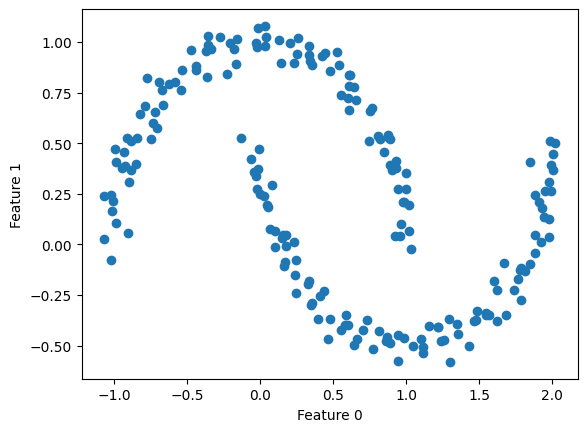

In [92]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

As you can see, the data is scattered forming to separate moons. Our mission is create a clustering mechanism that can effectively separate each of the clusters correctly.

## Rescale the data to zero mean and unit variance using StandardScaler

In [93]:
'''
# Define the StandardScaler in a variable called 'scaler'
# Fit scaler on X
# transform the data and store it in a variable called 'X_scaler'

** Write your code here
**
**
'''
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)


## KMeans Clustering

In [94]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_scaled)
kmeans_cluster = kmeans.predict(X_scaled)

Text(0, 0.5, 'Feature 1')

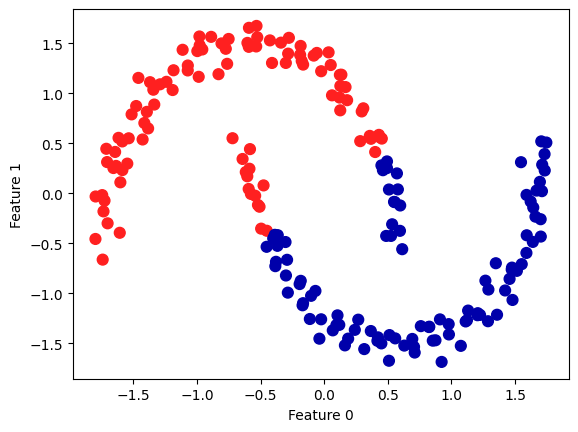

In [95]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_cluster, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Computing the silhouette score for KMe

In [96]:
silhouette_kme = silhouette_score(X_scaled, kmeans_cluster)
print(f"Silhouette Score: {silhouette_kme}")

Silhouette Score: 0.49304627727701233


## Agglomerative Clustering

In [97]:
'''
# Define and instance of AgglomerativeClustering
# Fit and predict on scaled X

** Write your code here
**
'''
agg = AgglomerativeClustering(n_clusters=2)
assignment = agg.fit_predict(X_scaled)


### Plot the obtained agglomerative clusters

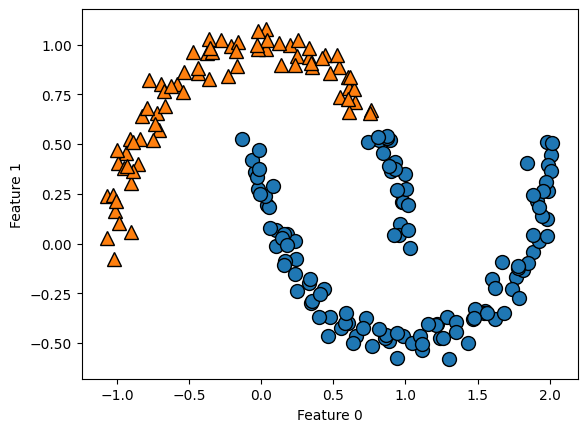

In [98]:
'''
# Use matplotlib to visualize a scatter plot of the obtained clusters. Make sure to name the x and y axis.

**Write your code here
**
**
'''
mglearn.discrete_scatter(X[:,0], X[:,1], assignment)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

### Compute the silhouette score for the obtained agglomerative clusters

In [99]:
'''
** Write your code here
'''
silhouette_agg = silhouette_score(X_scaled, assignment)
print(f"Silhouette Score: {silhouette_agg}")


Silhouette Score: 0.4572323945292666


## DBSCAN

In [100]:
'''
# Define and instance of DBSCAN
# Fit and predict on scaled X

** Write your code here
**
'''
dbscan = DBSCAN()
cluster = dbscan.fit_predict(X_scaled)


### Plot the obtained DBSCAN clusters

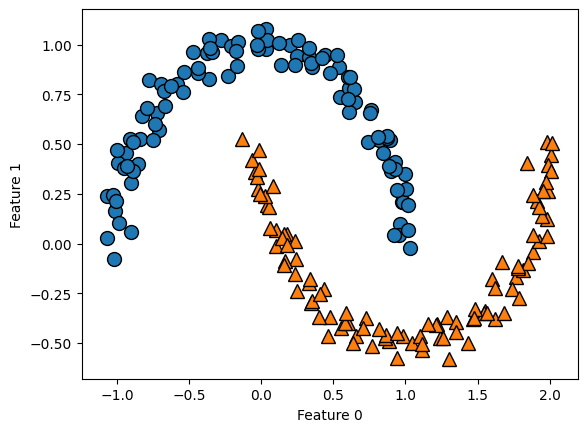

In [101]:
'''
# Use matplotlib to visualize a scatter plot of the obtained clusters. Make sure to name the x and y axis.

**Write your code here
**
**
'''
mglearn.discrete_scatter(X[:,0], X[:,1], cluster)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

### Compute the silhouette score for the obtained DBSCAN clusters

In [102]:
'''
** Write your code here
'''
silhouette_dbscan = silhouette_score(X_scaled, cluster)
print(f"Silhouette Score: {silhouette_dbscan}")

Silhouette Score: 0.382386022679393


## Interpret the obtained results

### After performing the three separate unsupervised clustering techniques: KMeans, Agglomerative, and DBSCAN clustering, explain which algorithm is best and justify your answer.

(write your answer here)
-->it is obvious that the DBSCAN algo is has the best result and is the bet choice in the moon-shaped data. as it can handle arbitrary shapes based on the density (min-samples and epsilon)
-->as for the agglometric its second to the best, although it can handle arbitrary shapes based on the distances btwn data pts but in our case it is less efficient.
-->and kmeans here is not a choice for this excercise as it assumumes the clusters are spherical so it cant handle arbitrary shapes well.